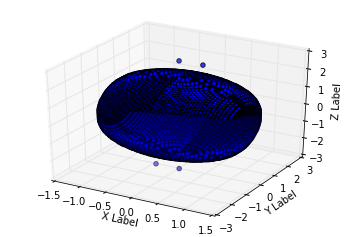

In [90]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy
import array_tools

k = '0.1'

x0 = 0.025
xn = 3.025
y0 = 0.025
yn = 3.025
z0 = 0.025
zn = 3.025
n = 60
dx = (xn - x0) / n
dy = (yn - y0) / n
dz = (zn - z0) / n

def load_slice(z):
    z = str(round(z, 3))
    name = 'xy_' + k + '_0.025-3.025_0.025-3.025_' + z + '_60'
    fo = open('/Users/hwb/Desktop/numerical monopoles/python_results/k=' + k + '/' + name, 'rb')
    bytes = numpy.fromfile(fo, dtype=numpy.uint8)
    shaped_list = array_tools.reconstruct_2d(bytes)
    return shaped_list



def get_point_tuples(e_min, e_max):
    
    points = []
    for k in range(n):
        z = z0 + k * dz
        shaped_list = load_slice(z)

        for i, xl in enumerate(shaped_list):
            for j, e in enumerate(xl):
                if (e > e_min and  e < e_max):
                    points.append((x0 + i*dx, y0 + j*dy, z))
    return points

def get_max_value():
    max = 0
    for k in range(n):
        z = z0 + k * dz
        shaped_list = load_slice(z)

        for i, xl in enumerate(shaped_list):
            for j, e in enumerate(xl):
                if (e > max and e != 255):
                    max = e
                    
    return max
    
def add_symmetric_points(original_points):
    points = []
    for t in original_points:
        points.append((t[0], t[1], t[2]))
        points.append((-t[0], t[1], t[2]))
        points.append((-t[0], -t[1], t[2]))
        points.append((t[0], -t[1], t[2]))
        points.append((t[0], t[1], -t[2]))
        points.append((-t[0], t[1], -t[2]))
        points.append((-t[0], -t[1], -t[2]))
        points.append((t[0], -t[1], -t[2]))
    return points


points = add_symmetric_points(get_point_tuples(50, 70))

x = map(lambda t: t[0], points)
y = map(lambda t: t[1], points)
z = map(lambda t: t[2], points)
            

    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.scatter(x, y, z)